In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [8]:
# project specific
from utils import data_handler
from utils.models import vae



### Generate dataset

In [16]:
x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True)

retained phase 2
loading samples...


### Generate model

In [9]:
vae_model = vae.generate_model(shape = (6161))


In [10]:
vae_model.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.mean_squared_error)

#### Train Model

In [11]:
hist = vae_model.fit(x_train, epochs = 1000) #2k provided good separation

Epoch 1/10


2023-07-13 18:37:08.832100: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 1s/step - loss: 2050409.1250 - reconstruction_loss: 2050409.1250 - kl_loss: 0.0397
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 2050401.7500 - reconstruction_loss: 2050401.6250 - kl_loss: 0.1837
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 2050394.0000 - reconstruction_loss: 2050393.5000 - kl_loss: 0.5300
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 2050383.5000 - reconstruction_loss: 2050382.1250 - kl_loss: 1.3769
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 2050358.1250 - reconstruction_loss: 2050355.1250 - kl_loss: 3.0215
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 2050324.8750 - reconstruction_loss: 2050318.8750 - kl_loss: 5.9661
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 2050240.3750 - reconstruction_loss: 2050229.5000 - kl_loss: 10.9304
Epoch 8/10
1/1 [==============================

#### Monitoring training results

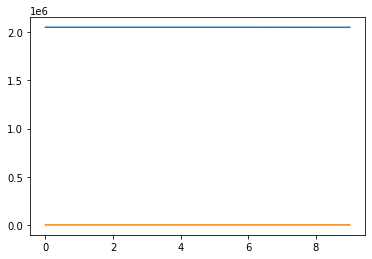

In [12]:
plt.plot(hist.history['reconstruction_loss'])
plt.plot(hist.history['kl_loss'])







In [10]:
#autoencoder.save('../workfiles/placeholder_model')
vae_model.encoder.save('../workfiles/vae_model_complex_phase_2')




INFO:tensorflow:Assets written to: ../workfiles/vae_model_complex_phase_2/assets


INFO:tensorflow:Assets written to: ../workfiles/vae_model_complex_phase_2/assets


### encoding the whole dataset

In [13]:
_, __, compressed_dataframe = vae_model.encoder.predict(x_train)


1/1 [==============================] - 0s 118ms/step


In [15]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [16]:
df.to_csv("../workfiles/compressed_data_vae_phase_2.csv")
